In [1]:
%matplotlib widget

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import astropy as ap
import specreduce

/Users/gnarayan/miniforge3/envs/astr/lib/python3.10/site-packages/specutils/io/registers.py:94: UserWarning: 'blah' data loader provided for Spectrum1D without explicit identifier or list of compatible extensions
  warnings.warn(f"'{label}' data loader provided for {dtype.__name__} without "


### Even though you are submitting these with `git` and this file tells you to rename it, and you should be pushing to a dedicated folder with your username, please also stick your name in this file here, so there's extra redundancy. 

The point of this assignment is to:
- get comfortable with photon energy, frequency, and wavelength - calculate power and luminosity
- know now to convert magnitudes, fluxes, photon counts.
- start basic Python scripts and plotting

# Q1. Make plot of the electromagnetic spectrum using Python. (30 pts)
- Your plot should have multiple x-axes - one for wavelength (in meters), one for frequency (in Hz), one for energy (in eV)
    (hint: `gridspec` or `subplots` in general can be used to do this. See if you can find something useful here: https://matplotlib.org/stable/gallery/index) (10 pts)
- axes should be lograthmic, and each of these axes should have ticklabels that are exponential above or below (5 pts)
- the wavelength axes should also have more conventional SI units for km, mm, micron, nm, Angstrom, and picometer labelled (5 pts)
- label each region of the EM spectrum (10 pts)

 Something like this: 

<img src="https://aktinovolia.com/wp-content/uploads/aktinovolia.com-radiation-chart-electromagnetic-spectrum-rf-em-spectrum-rf-electromagnetic-3-.jpg">

or (except you should have energy too) 

<img src="https://multiphaseism.wordpress.com/wp-content/uploads/2013/05/electromagnetic_spectrum.jpg">

# Remember to save your script. Stay organized. You will be reusing code.

You are encouraged to add your own flourishes to the plot.
Joseph is empowered to give out 5 points as he sees fit for aesthetics. 

Keep this plot handy. You should be able to intuitively convert between these values in your head. 

In [3]:
# One of the things you did was define conversions by hand.
# Don't. 
# Eventually you'll get it wrong and then your spacecraft will crash
# No really: 
# https://www.simscale.com/blog/nasa-mars-climate-orbiter-metric/
# This is why astropy.units exists. 

wave  = np.logspace(-13, 3, 10000) * ap.units.meter
freq = (ap.constants.c / wave).to('Hz')  
evolt = ((ap.constants.c * ap.constants.h)/wave).to('eV')


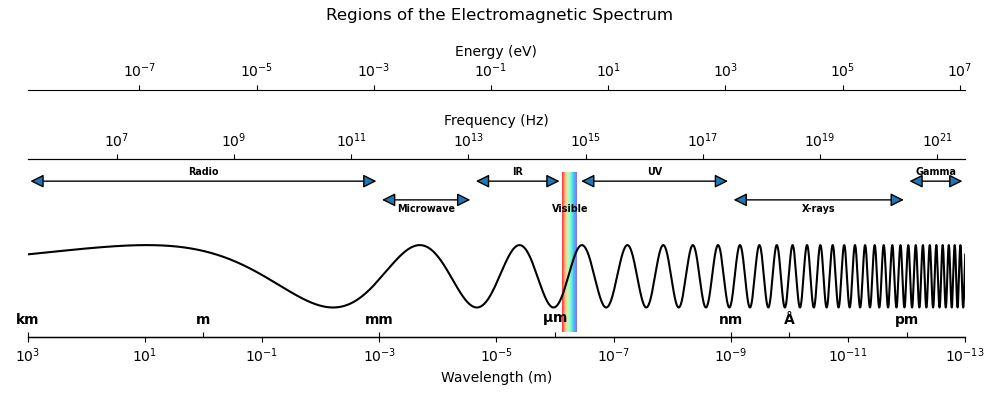

In [4]:
from matplotlib import patches

# Create figure and axes - we need multiple axes for frequency and energy. 
# I'll create one more for the SI unit version of the wavelengths
# this is worth 10 points - for more control, gridspec is more flexible than twinx/twiny
fig, ax_wave = plt.subplots(figsize=(10, 4))
ax_freq = ax_wave.twiny()  
ax_evolt = ax_wave.twiny()
ax_wave2 = ax_wave.twiny()

# I'll set y limits for the plots - since they are created with twiny, we can set these once
ymin = -1.7
ymax = 4

# Set x-limits for all axes
# notice that we use the reverse order for wavelength w.r.t frequency or energy
ax_wave.set_xlim(np.max(wave.value), np.min(wave.value))
ax_wave2.set_xlim(np.max(wave.value), np.min(wave.value))
ax_freq.set_xlim(np.min(freq.value), np.max(freq.value))
ax_evolt.set_xlim(np.min(evolt.value), np.max(evolt.value))

# offset the energy axis slightly 
ax_evolt.spines['top'].set_position(('outward', 50))  # Offset Energy (further from the main axis)
ax_wave2.spines['top'].set_position(("axes", 0))

# We'll plot intensity - this is purely a graphical element - just make sure that frequency inreases the right way
intensity = np.sin( np.power(freq.value * 2 * np.pi / 1e7, 0.15))
ax_wave.plot(wave, intensity+0.25, color='black', label='Intensity Variation')

# Set all x-axes to log scale because that's worth 5 points - note that this sets the ticklabel notation to exponential automatically
ax_wave.set_xscale('log')
ax_wave2.set_xscale('log')
ax_freq.set_xscale('log')
ax_evolt.set_xscale('log')

# we need to define wavelength ranges - I'm getting them from here:
# http://labman.phys.utk.edu/phys222core/modules/m6/The%20EM%20spectrum.html
# this is worth 10 points
wave_reg = {'Gamma':(1e-13, 1e-12),
            'X-rays':(1e-12, 1e-9),
            'UV':(1e-9,400e-9),
            'Visible':(400e-9, 750e-9),
            'IR':(750e-9, 25e-6),
            'Microwave':(25e-6,1e-3),
            'Radio':(1e-3, 1e3)}

# for each of the regions, I'm going to create a simple arrow like the first figure
# this is with matplotlib patches, which you should get famililar with in grad school
# because now you are actually paid to make good figures, and your success in proposals
# or in papers, depends upon it. 
for i, region in enumerate(wave_reg):
    if i%2 == 0:
        offset = 1
    else:
        offset = -1
    head, tail = wave_reg[region]

    # for the bisible I'll add a rainbow region
    # this is inspired by Henna and the example figures
    # but unlike Henna, I won't cheat on the axes limits 
    if region == 'Visible':
        rainbow_start = 750e-9  
        rainbow_end = 400e-9  

        gradient = np.linspace(0, 1, 256).reshape(1, -1)
        gradient = np.vstack((gradient, gradient))
        ax_wave.imshow(gradient, aspect='auto', cmap='rainbow_r', interpolation='bicubic',
            extent=[rainbow_start, rainbow_end, ymin*0.90, ymax*0.9], alpha=0.75)
    else:
        patch = patches.FancyArrowPatch((tail, 3+offset*0.3), (head, 3+offset*0.3), arrowstyle='<|-|>', mutation_scale=20)
        ax_wave.add_patch(patch)

    # remember that the axes are going to be lograthmic not linear so find the appropriate midpoint 
    midpt = 10.**((np.log10(head) + np.log10(tail))/2)
    ax_wave.text(midpt, 3+offset*0.6, s=region, fontsize='x-small', ha='center',va='center', fontweight='bold')



# Disable the spines on the left and right - i.e. the y-axes - this is purely for aesthetics
# it just makes the figure look more graphical and less like a plot
ax_wave.spines.left.set_visible(False)
ax_wave2.spines.left.set_visible(False)
ax_freq.spines.left.set_visible(False)
ax_evolt.spines.left.set_visible(False)
ax_wave.spines.right.set_visible(False)
ax_wave2.spines.right.set_visible(False)
ax_freq.spines.right.set_visible(False)
ax_evolt.spines.right.set_visible(False)

# lets set those ylimits now that we've plotted most things
# we also disable any yaxis labels
ax_wave.set_ylim(ymin, ymax)
ax_wave.set_yticks([])

# we want SI units because that's worth 5 points
wave2_pos = [3, 0, -3, -6, -9, -10, -12]
# you can embed mathtex in your matplotlib strings with using a raw-string 'r' 
# and then '$' to escape the mathetex as you would in latex
wave2_names = ['km','m','mm',r'$\mathbf{\mu m}$', 'nm', r'$\mathbf{\AA}$', 'pm']
ax_wave2.set_xticks(np.power(10., wave2_pos))
ax_wave2.set_xticklabels(wave2_names, fontweight='bold')

# finally, because we're good scientists, we label our axes
ax_wave.set_xlabel('Wavelength (m)')
ax_freq.set_xlabel('Frequency (Hz)')
ax_evolt.set_xlabel('Energy (eV)')

fig.suptitle('Regions of the Electromagnetic Spectrum')

fig.tight_layout()
fig.savefig('HW1_A1_EM_spectrum.pdf')

In [5]:
#plt.close(fig) - it's a good idea to close your figures 

# Q2. Dealing with Data from Multiple Sources - adding passbands and atmospheric transmission (30 pts)

### 2.1
Get the Optical Atmospheric Transmission using the `specreduce` package
    `pip install specreduce`
    https://specreduce.readthedocs.io/en/latest/extinction.html

Note that the optical transmission curves do not include the effect of molecules as the website tells you.
Follow their instructions to add 2.3mm of Preciptiable Water Vapr at an Airmass of 1.0 to the optical transmission. 

Get NIR and MIR transmission curves from here (we're not using MIR this week, but you'll use this code next HW as well)
	http://www.gemini.edu/sciops/telescopes-and-sites/observing-condition-constraints/ir-transmission-spectra
(Cerro Pachon, 2.3mm of Precipitable Water Vapor, Airmass 1.0)


### 2.2
Get the LSST Filter Transmissions (ugrizy, filter only) from here:
http://svo2.cab.inta-csic.es/theory/fps3/index.php?mode=browse

and the IRTF (\[JHK\]_MK, filter only) transmissions from here:
https://irtfweb.ifa.hawaii.edu/~nsfcam2/Filter_Profiles.html

## !Please note that the filter tranmissions are determined by counting photons, not measuing energy! 

### 2.3

Finally, get the SEDs of three stars from CALSPEC:
https://www.stsci.edu/hst/instrumentation/reference-data-for-calibration-and-tools/astronomical-catalogs/calspec
and for the actual data:
https://archive.stsci.edu/hlsps/reference-atlases/cdbs/current_calspec/

(There is no M5V but there is a M3.5V star - BD-11 3759)


Finally, reconstruct a plot like this (set the wavelength ranges appropriately for the filters I've listed)
<img src="https://www.researchgate.net/profile/C-Chiosi/publication/1925441/figure/fig1/AS:339731901632519@1458009805844/The-filter-sets-used-in-the-present-work-From-top-to-bottom-we-show-the-filter-detector.png">

except replace the middle panel with the atmospheric transmission from your interpolator.

Something like this for the atmosphere plot (but until the wavelength you need): 
<img src="https://www.researchgate.net/profile/Joseph-Shaw-3/publication/260940640/figure/fig3/AS:296902361927680@1447798447054/Atmospheric-transmittance-versus-wavelength-calculated-with-Modtran5-for-a-zenith.png">

In [6]:
import matplotlib.gridspec as gs
from matplotlib import ticker

import scipy.interpolate as spi 
import astropy
import astropy.io
import astropy.table as at

import os
import glob

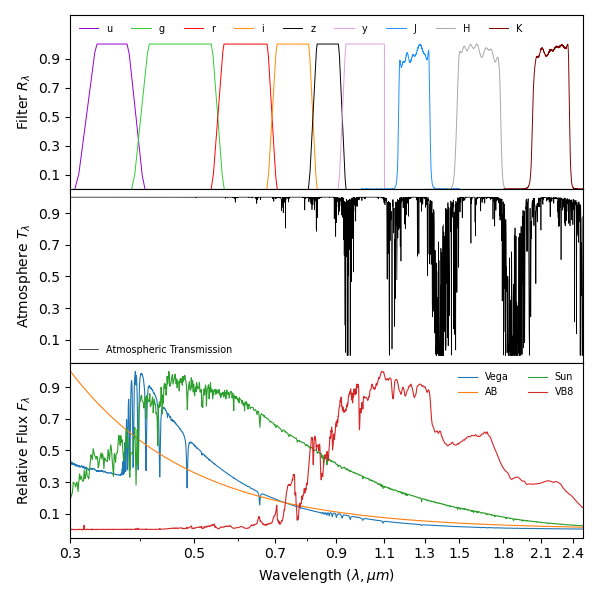

In [7]:
# this time we'll use gridspec instead of just twinx
fig2 = plt.figure(figsize=(6, 6))
grid = gs.GridSpec(nrows=3, ncols=1, hspace=0.)

# setup the grid of figures
ax_filter = fig2.add_subplot(grid[0,0])
ax_atmos = fig2.add_subplot(grid[1, 0], sharex=ax_filter)
ax_sed  = fig2.add_subplot(grid[2, 0], sharex=ax_filter)

# set the axes labels early on - this will make it clear what we're plotting where
ax_sed.set_xlabel(r'Wavelength ($\lambda, \mu m$)')
ax_sed.set_ylabel(r'Relative Flux $F_\lambda$')
ax_atmos.set_ylabel(r'Atmosphere $T_\lambda$')
ax_filter.set_ylabel(r'Filter $R_\lambda$')

# we have sharex = True, but you presumably do not want labels on all the axes
plt.setp(ax_filter.get_xticklabels(), visible=False)
plt.setp(ax_atmos.get_xticklabels(), visible=False)

# finally we have some overlapping y-axes labels - let's just fix that
yticks = [0.1, 0.3, 0.5, 0.7, 0.9]
ax_filter.set_yticks(yticks)
ax_atmos.set_yticks(yticks)
ax_sed.set_yticks(yticks)

min_wave = 0.3*ap.units.micron
max_wave = 2.5*ap.units.micron


# OK lets plot the SEDs - let's create a functon to read the SEDs
# If you are going to do something more than once, make it a function
def read_calspec_fits(fitsfile):
    '''
    read CALSPEC SED and return wavelength and flux in microns, Flam
    '''
    fitsdata = astropy.io.fits.open(fitsfile)
    wave = (fitsdata[1].data['WAVELENGTH'] * ap.units.Angstrom).to(ap.units.micron)
    flux = fitsdata[1].data['FLUX'] * ap.units.erg/ap.units.s/ap.units.cm**2./ap.units.Angstrom
    flux = flux.to(ap.units.erg/ap.units.s/ap.units.cm**2./ap.units.micron)
    fitsdata.close()
    return wave, flux

# load the SEDs
vega_wave, vega_flux = read_calspec_fits('seds/alpha_lyr_stis_011.fits')
sun_wave, sun_flux = read_calspec_fits('seds/sun_reference_stis_002.fits')
m5_wave, m5_flux = read_calspec_fits('seds/vb8_stiswfcnic_004.fits')
AB_wave = vega_wave
AB_fnu = np.repeat(3631., len(AB_wave))*ap.units.Jy
AB_flux = (AB_fnu*ap.constants.c/(vega_wave**2.)).to(ap.units.erg/ap.units.s/ap.units.cm**2./ap.units.micron)

def plot_norm_sed(wave, flux, color='k', lw=0.8, label=None):
    ind = (wave >= min_wave) & (wave <= max_wave)
    ax_sed.plot(wave[ind], flux[ind]/flux[ind].max(), color=color, linestyle='-', lw=lw, label=label)

plot_norm_sed(vega_wave, vega_flux, color='C0', lw=0.8, label='Vega')
plot_norm_sed(AB_wave, AB_flux, color='C1', lw=0.8, label='AB')
plot_norm_sed(sun_wave, sun_flux, color='C2', lw=0.8, label='Sun')
plot_norm_sed(m5_wave, m5_flux, color='C3', lw=0.8, label='VB8')
              

ax_sed.set_xlim(min_wave.value, max_wave.value)
ax_sed.set_xscale('log')
ax_sed.legend(frameon=False, fontsize='x-small', ncols=2, loc='upper right')


class atmos_trans:
    '''
    I've already suggested we'll use this atmospheric transmission thing again
    So lets make it a class 
    '''
    def __init__(self):
        # do yourself a favor and name columns consistently if you're dealing with the same data
        self._optical = at.Table.read('trans/2.3mm_pwv_transmission.txt', format='ascii.csv')
        self._nir = at.Table.read('trans/nir_cptrans_zm_23_10.dat', format='ascii', names=('wavelength','transmission'))
        self._mir = at.Table.read('trans/mir_cptrans_nq_23_10.dat', format='ascii', names=('wavelength','transmission'))
        self._optical['wavelength'] = self._optical['wavelength']*ap.units.micron
        self._nir['wavelength'] = self._nir['wavelength']*ap.units.micron
        self._mir['wavelength'] = self._mir['wavelength']*ap.units.micron
        
        # deal with the overlaps on read
        ind = self._nir['wavelength'] > self._optical['wavelength'].max()
        self._nir = self._nir[ind]
        ind = self._mir['wavelength'] > self._nir['wavelength'].max()
        self._mir = self._mir[ind]
        
        
        # we know these files are from different sources
        # we've dealt with the overlaps already, but we know there is a gap
        # we'll allow interpolation between these ranges by tweaking the left edge of range X 
        # to be exactly the right edge of range X-1
        self._wave_ranges = {'optical':(self._optical['wavelength'].min()*ap.units.micron, self._optical['wavelength'].max()*ap.units.micron),
                             'nir':(self._optical['wavelength'].max()*ap.units.micron, self._nir['wavelength'].max()*ap.units.micron),
                             'mir':(self._nir['wavelength'].max()*ap.units.micron, self._mir['wavelength'].max()*ap.units.micron)}
        # now we'll keep a track of the overall minimum and maximum wavelength so we do not go beyond
        self._minwave = np.min([self._wave_ranges[key][0].value for key in self._wave_ranges])*ap.units.micron
        self._maxwave = np.max([self._wave_ranges[key][1].value for key in self._wave_ranges])*ap.units.micron

        # setup the individual interpolator objects - notice that I'm keeping the keys the same
        self._interpolators = {'optical':spi.splrep(self._optical['wavelength'], self._optical['transmission']),
                                'nir': spi.splrep(self._nir['wavelength'], self._nir['transmission']),
                                'mir': spi.splrep(self._mir['wavelength'], self._mir['transmission'])}

    # We'll just make a function that takes an input wavelength
    def __call__(self, wave):
        '''
        Does the interpolation of atmospheric transmission across all three objects over the valid range
        and then returns the interpolated transmission at the selected wavelengths
        '''
        # just make sure we're not extrapolating outside the region we have data
        minwave = np.min(wave)
        maxwave = np.max(wave)
        if minwave < self._minwave:
            raise ValueError(f'Minimum wavelength requested {minwave:.3f} is too low for interpolator {self._minwave:.3f}')
        if maxwave > self._maxwave:
            raise ValueError(f'Maximum wavelength requested {maxwave:.3f} is too high for interpolator {self._maxwave:.3f}')

        interp_wave = {}
        interp_trans = {}
        for region in self._wave_ranges:
            ind = (wave >= self._wave_ranges[region][0]) & (wave < self._wave_ranges[region][1])
            if len(wave[ind]) > 0:
                interp_wave[region] = wave[ind]
                
                # we just pad *WITHIN* the region we have data 
                # this deals with the gap between NIR and MIR
                interp_trans[region] = spi.splev(wave[ind], self._interpolators[region], ext=3)

        out_wave = np.hstack([interp_wave[region] for region in interp_wave])
        out_trans = np.hstack([interp_trans[region] for region in interp_trans])
        return out_wave, out_trans

# now we use this class to create an interplator object
trans = atmos_trans()
ind = (vega_wave >= min_wave) & (vega_wave <= max_wave ) # select at Vega's wavelengths in the range we specified
wave = vega_wave[ind]
atmos_wave, atmos_trans = trans(wave) # get the transmission of the atmospheres at the Vega wavelengths

ax_atmos.plot(atmos_wave, atmos_trans, 'k-', lw=0.5, label='Atmospheric Transmission')
ax_atmos.legend(frameon=False, fontsize='x-small', ncols=3, loc='lower left')

# finally we do the passbands - use a regex to match the files in the directory
passbands = glob.glob('filters/*')

# map the passband names to color
col_map = {'u':'DarkViolet', 
           'g':'LimeGreen',
           'r':'Red',
           'i':'DarkOrange',
           'z':'black',
           'y':'Plum',
           'J':'DodgerBlue',
           'H':'DarkGray',
           'K':'Maroon'}

# load the data 
pbfile = {}
for pb in passbands:
    # fix the passband name - there's no magic here - you have to know how the files are named
    pbname = os.path.basename(pb).replace('.dat','').replace('_filter','').replace('_trans','').replace('LSST_LSST.','').replace('nsfcam_','')
    pbdata = at.Table.read(pb, format='ascii', names=('wave','trans')) # read each file
    if len(pbname) > 1:
        pbname = pbname.replace('mk','').upper()
    else:
        pbdata['wave'] = pbdata['wave']/1.e4 # the LSST passbands are in Angstrom, the NIR ones are in microns.
    pbdata['wave'] = pbdata['wave'] * ap.units.micron
    pbfile[pbname] = pbdata

# note that we loaded the data in whatever order the file system listed them
# but now we plot them in the order we specified in the col_map dictionary
# which also happens to be be in wavelength order
for pbname in col_map:
    pbdata = pbfile[pbname]
    ax_filter.plot(pbdata['wave'], pbdata['trans']/pbdata['trans'].max(), linestyle='-', color=col_map[pbname], label=pbname, lw=0.7)
ax_filter.legend(frameon=False, ncols=9, fontsize='x-small', loc='upper left')
ax_filter.set_ylim(0, 1.2)

# tidy up the wavelength axes
ax_sed.set_xticks([0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.8, 2.1, 2.4])
ax_sed.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}"))
ax_sed.xaxis.set_minor_formatter(ticker.NullFormatter())

# and save the figure
fig2.tight_layout()
fig2.savefig('HW1_A2_SED_filter_atmosphere_transmissions.pdf')

In [8]:
#plt.close(fig2)

# Q3. Combine the filter transmission and your atmosphere transmission - we'll assume the mirror and CCDs are perfect over the entire wavelength range. Implement the integrals for flux and magnitude discussed in Lecture 3 as python code. (40 pts)

- You'll have to do something to `interpolate` measurements continuously across the full wavelength range you have across Optical to NIR (you can ignore the MIR file for now, but you'll want it next week)
- Make sure the units are consistent for both wavelength and transmission before you write your interpolator or address differences in some other way 
- You'll need to make sure your interpolator can match the wavelength spacing of the SEDs in Q2
- Rememeber that the intergrals intclude the transmission $T(\lambda)$, which is not normalized properly, so make sure to normalize your integral appropriately
- Normalize the synthetic flux in two ways
    1. such as Vega has magnitude 0 in each band.
    2. such that a synthetic AB source has magnitude 0 in each band

Report the magitudes of the Sun and BD-11 3759 in the Vega and AB system, and the AB magnitudes of Vega in a table (columns = passbands, rows = star/system)

- 15 pts each for the Sun and BD-11 3759 (2 pts for the six optical bands, 1 pt each for JHK) 
- 10 pts for the AB mags of Vega (yes, I know there are 9 bands, not 10, but you can have the one extra)

In [9]:
def synflux(wave, flux, response):
    n = np.trapz(flux*wave*response, wave)
    d = np.trapz(wave*response, wave)
    out = n/d
    return out

def synphot(wave, flux, response, zpt=0.):
    iflux = synflux(wave, flux, response)
    m = -2.5*np.log10(iflux.value) + zpt
    return m

# keep some of the output sorted - for the zeropoints
vega_zpt = {}
AB_zpt = {}

# for the magnitudes
sun_mags_AB = {}
sun_mags_vega = {}
m5_mags_AB = {}
m5_mags_vega = {}
vega_mags_AB = {}

# let's just be smart and interpolate everything, including the other SEDs on to the wavelength grid for Vega once
ind = (vega_wave >= min_wave) & (vega_wave <= max_wave)
atm_wave, atm = trans(vega_wave[ind])

# if we wanted even more precision, we could do the interpolation in log-wave, log-flux
sun_int_flux = np.interp(vega_wave[ind], sun_wave, sun_flux)
m5_int_flux = np.interp(vega_wave[ind], m5_wave, m5_flux)

for pbname in col_map:
    pbdata = pbfile[pbname]
 
    # notice that some of the measured photon responses can go negative
    # they're measurements after all... random noise.
    # fix it with a list comprehension
    pbtrans = np.array([ x if x >= 0 else 0. for x in pbdata['trans']])
    sort_wave = np.argsort(pbdata['wave'])

    # interpolate the passband once each time
    pbspl = spi.splrep(pbdata['wave'][sort_wave], pbtrans[sort_wave])
    pb = spi.splev(vega_wave[ind], pbspl, ext=1) #ext=1 zero-pads (yes I know that's weird) outside the range
       
    # note that the JHK filters already have an atmosphere built in
    if pbname in ['u', 'g', 'r', 'i', 'z', 'y']:
        this_atm = atm      
    else:
        this_atm = np.repeat(1., len(vega_wave[ind]))

    total_resp = pb*this_atm

    # calculate the zeropoints w.r.t to vega and AB respectively. I've put the 0. in explictly so you can compare
    # remember that not all standards have to be defined to have magnitude 0.
    vega_intflux = synflux(vega_wave[ind], vega_flux[ind], total_resp)
    AB_intflux = synflux(AB_wave[ind], AB_flux[ind], pb*total_resp)
    pb_vega_zpt = 0. + 2.5*np.log10(vega_intflux.value) 
    pb_AB_zpt   = 0. + 2.5*np.log10(AB_intflux.value)

    # save the zeropoints
    vega_zpt[pbname] = pb_vega_zpt
    AB_zpt[pbname] = pb_AB_zpt

    # do the synthetic photometry
    pb_sun_AB_mag = synphot(vega_wave[ind], sun_int_flux, total_resp, zpt=pb_AB_zpt)
    pb_m5_AB_mag = synphot(vega_wave[ind], m5_int_flux, total_resp, zpt=pb_AB_zpt)
    pb_vega_AB_mag = synphot(vega_wave[ind], vega_flux[ind], total_resp, zpt=pb_AB_zpt)
    pb_sun_vega_mag = synphot(vega_wave[ind], sun_int_flux, total_resp, zpt=pb_vega_zpt)
    pb_m5_vega_mag = synphot(vega_wave[ind], m5_int_flux, total_resp, zpt=pb_vega_zpt)

    # save the results
    sun_mags_AB[pbname] = pb_sun_AB_mag
    m5_mags_AB[pbname] = pb_m5_AB_mag
    vega_mags_AB[pbname] = pb_vega_AB_mag
    sun_mags_vega[pbname] = pb_sun_vega_mag
    m5_mags_vega[pbname] = pb_m5_vega_mag

# format a reasonable output table
# most of you know how to do this with Pandas so I'll do it the astropy way.
out_rows = []
out_rows.append(['Vega Zeropoint',]+ list(vega_zpt.values()))
out_rows.append(['AB Zeropoint',]+ list(AB_zpt.values()))
out_rows.append(['Sun AB Mags',]+ list(sun_mags_AB.values()))
out_rows.append(['Sun Vega Mags',]+ list(sun_mags_vega.values()))
out_rows.append(['M5 AB Mags',]+ list(m5_mags_AB.values()))
out_rows.append(['M5 Vega Mags',]+ list(m5_mags_vega.values()))
out_rows.append(['Vega ABMags',]+ list(vega_mags_AB.values()))
out_table = at.Table(rows=out_rows, names = ['Name',] + list(col_map))

# and then we format it reasonably because we're not slipshod. 
for pb in col_map:
    out_table[pb].info.format='+.3f'

In [10]:
out_table

Name,u,g,r,i,z,y,J,H,K
str14,float64,float64,float64,float64,float64,float64,float64,float64,float64
Vega Zeropoint,-10.982,-10.683,-11.516,-12.167,-12.619,-13.049,-13.819,-14.833,-16.010
AB Zeropoint,-10.168,-10.791,-11.371,-11.794,-12.106,-12.442,-12.890,-13.464,-14.122
Sun AB Mags,-25.197,-26.471,-26.932,-27.041,-27.059,-27.060,-27.013,-26.878,-26.413
Sun Vega Mags,-26.012,-26.363,-27.077,-27.414,-27.573,-27.667,-27.942,-28.246,-28.300
M5 AB Mags,+21.284,+17.662,+16.003,+13.251,+11.934,+11.122,+10.654,+10.572,+10.655
M5 Vega Mags,+20.469,+17.770,+15.858,+12.878,+11.421,+10.515,+9.724,+9.204,+8.768
Vega ABMags,+0.814,-0.108,+0.145,+0.373,+0.513,+0.607,+0.929,+1.369,+1.888


### Divide and conquer, so you encounter issues in parallel and can explain things to each other, rather than working in series. 

# Due Sep 17 at Noon!